In [6]:
!pip install pandas numpy scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [7]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

In [8]:
# 🧮 INTRODUCTION TO PRECISION AND RECALL (Binary Classification)

# Precision and recall are key metrics in binary classification.
# They go beyond "accuracy" to tell us *how well* we detect the positive class.

# ------------------------------------------------------------------------------
# EXAMPLE 1: Intuition
# ------------------------------------------------------------------------------
# Suppose we have a spam classifier. "Positive" = email is spam.

# Confusion matrix for a toy example:
#                    PREDICTED
#                SPAM    |   NOT SPAM
# ACTUAL   SPAM     80   |     20
#          NOTSPAM  10   |    890
# -----------------------------------
# True Positives (TP) = 80
# False Positives (FP) = 10
# False Negatives (FN) = 20
# True Negatives (TN) = 890

# Accuracy = (TP + TN) / Total = (80 + 890) / 1000 = 0.97
# Precision = TP / (TP + FP) = 80 / (80 + 10) = 0.89  (How *reliable* are positive predictions?)
# Recall = TP / (TP + FN) = 80 / (80 + 20) = 0.80     (How *complete* are our detections?)
# F1 = 2 * (Precision * Recall) / (Precision + Recall) = 0.84

TP, FP, FN, TN = 80, 10, 20, 890
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FP + FN + TN)

print("Example 1 — Spam Classifier")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {f1:.2f}")



Example 1 — Spam Classifier
Accuracy:  0.97
Precision: 0.89
Recall:    0.80
F1-score:  0.84



Example 2 — scikit-learn metrics
Confusion Matrix:
 [[4 0]
 [2 4]]
Precision: 1.00
Recall:    0.67
F1-score:  0.80


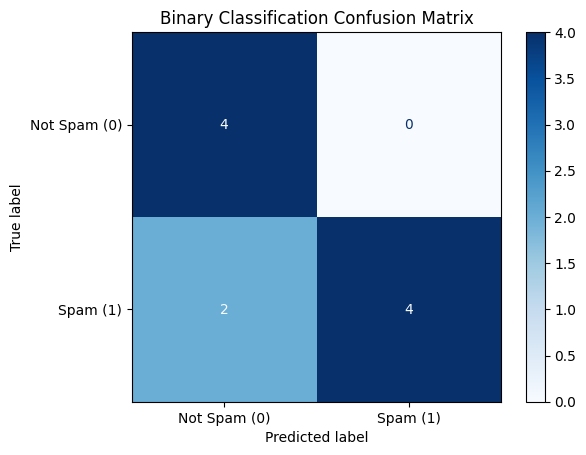

In [9]:
# ------------------------------------------------------------------------------
# EXAMPLE 2: Compute metrics directly from predictions
# ------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# True labels (1 = spam, 0 = not spam)
y_true = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
# Predicted labels
y_pred = [1, 0, 1, 0, 0, 0, 1, 0, 1, 0]

# Compute metrics using scikit-learn
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print("\nExample 2 — scikit-learn metrics")
print("Confusion Matrix:\n", cm)
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-score:  {f1:.2f}")

# Visualize confusion matrix
ConfusionMatrixDisplay(cm, display_labels=["Not Spam (0)", "Spam (1)"]).plot(cmap="Blues")
plt.title("Binary Classification Confusion Matrix")
plt.show()



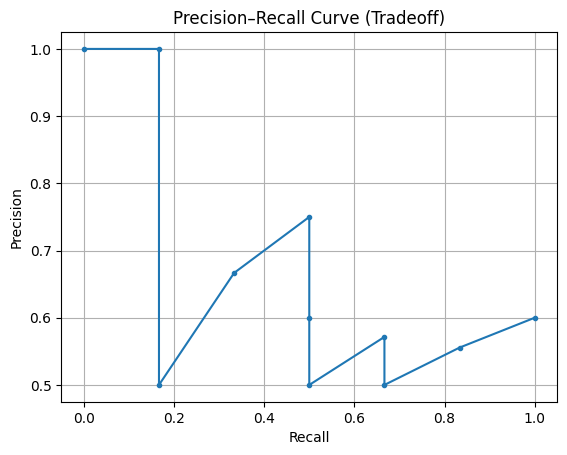

In [10]:
# ------------------------------------------------------------------------------
# EXAMPLE 3: Exploring threshold effects
# ------------------------------------------------------------------------------
# Precision and recall depend on the decision threshold used to label something as "positive."
# Lower threshold -> higher recall, lower precision.
# Higher threshold -> higher precision, lower recall.

import numpy as np
from sklearn.metrics import precision_recall_curve

# Simulated classifier scores (probabilities of being positive)
y_scores = np.array([0.9, 0.8, 0.7, 0.55, 0.52, 0.45, 0.4, 0.35, 0.2, 0.1])

precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)

plt.plot(recalls, precisions, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Tradeoff)")
plt.grid(True)
plt.show()



In [11]:
# ------------------------------------------------------------------------------
# KEY TAKEAWAYS
# ------------------------------------------------------------------------------
# • Precision = correctness among predicted positives
# • Recall = coverage among actual positives
# • F1-score = harmonic mean (balances both)
# • Use precision–recall curves to study tradeoffs.
# • For imbalanced data (e.g., fraud detection), precision & recall are often
#   more meaningful than accuracy.